In [1]:
# !pip install lifelines
# !pip install pycox
# !pip install xgbse
# !pip install optuna
# !pip install shap
# !pip install --upgrade ipykernel
# !pip install seaborn
# !pip install sklearn_pandas
# !pip install tableone
# !pip install torch
# !pip install plotly
# !pip install --upgrade survlimepy

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os

In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)


In [4]:
datapath = './data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = './save/'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               773 non-null    int64  
 1   NAC              773 non-null    int64  
 2   Pre_WBC          773 non-null    object 
 3   Pre_Neu          773 non-null    object 
 4   Pre_Lym          773 non-null    object 
 5   Pre_Plt          773 non-null    object 
 6   Pre_Hb           773 non-null    object 
 7   Pre_Crp          773 non-null    object 
 8   Pre_alb          773 non-null    object 
 9   Pre_cr           773 non-null    object 
 10  Pre_GFR          773 non-null    object 
 11  Pre_CO           773 non-null    object 
 12  Age              773 non-null    int64  
 13  Female           773 non-null    int64  
 14  BMI              773 non-null    float64
 15  DM               773 non-null    int64  
 16  HTN              773 non-null    int64  
 17  Location_Pelvis 

In [6]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B'],
      dtype='object')

In [7]:
data['Pre_WBC'].replace({' ':np.nan},inplace=True)
data['Pre_WBC'] = data['Pre_WBC'].astype(float)
data['Pre_Neu'].replace({' ':np.nan},inplace=True)
data['Pre_Neu'] = data['Pre_Neu'].astype(float)
data['Pre_Lym'].replace({' ':np.nan},inplace=True)
data['Pre_Lym'] = data['Pre_Lym'].astype(float)
data['Pre_Plt'].replace({' ':np.nan},inplace=True)
data['Pre_Plt'] = data['Pre_Plt'].astype(float)
data['Pre_Hb'].replace({' ':np.nan},inplace=True)
data['Pre_Hb'] = data['Pre_Hb'].astype(float)
data['Pre_Crp'].replace({' ':np.nan},inplace=True)
data['Pre_Crp'] = data['Pre_Crp'].astype(float)
data['Pre_alb'].replace({' ':np.nan},inplace=True)
data['Pre_alb'] = data['Pre_alb'].astype(float)
data['Pre_cr'].replace({' ':np.nan},inplace=True)
data['Pre_cr'] = data['Pre_cr'].astype(float)
data['Pre_GFR'].replace({' ':np.nan},inplace=True)
data['Pre_GFR'] = data['Pre_GFR'].astype(float)
data['Pre_CO'].replace({' ':np.nan},inplace=True)
data['Pre_CO'] = data['Pre_CO'].astype(float)


data['Path_N'].replace({' ':np.nan},inplace=True)
data['Path_N'] = data['Path_N'].astype(float)

data['Path_Grade'].replace({' ':np.nan},inplace=True)
data['Path_Grade'] = data['Path_Grade'].astype(float)

data['Path_CIS'].replace({' ':np.nan},inplace=True)
data['Path_CIS'] = data['Path_CIS'].astype(float)

data['Prg'].replace({' ':np.nan},inplace=True)
data['Prg'] = data['Prg'].astype(float)

data['PFS'].replace({' ':np.nan},inplace=True)
data['PFS'] = data['PFS'].astype(float)

data['OS'].replace({' ':np.nan},inplace=True)
data['OS'] = data['OS'].astype(float)

data['REC_B'].replace({' ':np.nan},inplace=True)
data['REC_B'] = data['REC_B'].astype(float)

data['RFS_B'].replace({' ':np.nan},inplace=True)
data['RFS_B'] = data['RFS_B'].astype(float)

In [8]:
data['Location_multiple']=data['Location_Pelvis']+data['Location_Upper']+data['Location_Mid']+data['Location_lower']

In [9]:
raw = data

In [10]:
import xgboost as xgb

## 1. Data preprocessing & Missing value exploration

In [11]:
from tableone import TableOne

In [12]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B', 'Location_multiple'],
      dtype='object')

In [13]:
data = data[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb','NAC',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'Prg', 'PFS', 'OS', 'Surv']]

In [14]:
meta = data.dropna(subset=['Prg','PFS','OS', 'Surv'])

In [15]:
meta['HTN'].replace({2:1},inplace=True)

C:\Users\JUN\AppData\Local\Temp\ipykernel_544\446701576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['HTN'].replace({2:1},inplace=True)


In [16]:
table1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True)


In [17]:
table1

Missing             Overall
n                                                        677
Pre_WBC, mean (SD)                     0     6956.4 (5467.3)
Pre_Neu, mean (SD)                     0         60.1 (11.0)
Pre_Lym, mean (SD)                     0          29.0 (9.5)
Pre_Plt, mean (SD)                     0  234885.7 (68192.8)
Pre_Hb, mean (SD)                      0          12.7 (1.9)
NAC, n (%)                   0         0          627 (92.6)
                             1                      50 (7.4)
Pre_Crp, mean (SD)                     0           0.8 (2.2)
Pre_alb, mean (SD)                     0           3.8 (0.6)
Pre_cr, mean (SD)                      0           1.1 (0.6)
Pre_GFR, mean (SD)                     0         81.3 (39.7)
Pre_CO, mean (SD)                      1          21.3 (9.9)
Age, mean (SD)                         0         68.4 (10.0)
Female, n (%)                0         0          479 (70.8)
                             1                    198 (29.2)
BMI, mean (SD)                         0         25.1 (12.7)
DM, n (%)                    0         0          514 (75.9)
                             1                    163 (24.1)
HTN, n (%)                   0         0          338 (49.9)
                             1                    339 (50.1)
Location_Pelvis, n (%)       0         0          330 (48.7)
                             1                    347 (51.3)
Location_multiple, mean (SD)           0           1.2 (0.5)
HUN, n (%)                   0         0          316 (46.7)
                             1                    361 (53.3)
path_T, mean (SD)                      0           3.6 (1.4)
Path_N, mean (SD)                    366           0.3 (0.7)
Path_Grade, n (%)            0.0      34           98 (15.2)
                             1.0                  545 (84.8)
Path_CIS, n (%)              0.0      13          391 (58.9)
                             1.0                  273 (41.1)
Prg, n (%)                   0.0       0          495 (73.1)
                             1.0                  182 (26.9)
PFS, mean (SD)                         0         40.9 (30.8)
OS, n (%)                    0.0       0          472 (69.7)
                             1.0                  205 (30.3)
Surv, mean (SD)                        0         45.3 (28.7)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Pre_alb, Pre_CO, Age, Location_multiple, path_T, Path_N.
[2] Normality test reports non-normal
                                  distributions for: Pre_WBC, Pre_Neu, Pre_Lym, Pre_Plt, Pre_Crp, Pre_alb, Pre_cr, Pre_GFR, Pre_CO, Age, BMI, Location_multiple, path_T, Path_N, PFS, Surv.
[3] Tukey test indicates far outliers
                                  in: Pre_WBC, Pre_Plt, Pre_Crp, Pre_cr, Pre_GFR, Pre_CO, Location_multiple, Path_N.

In [18]:
table1.to_csv(datapath+'/'+'Table1.csv')

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [20]:
meta.describe()

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,...,677.000000,677.000000,677.000000,311.000000,643.000000,664.000000,677.000000,677.000000,677.000000,677.000000
mean,6956.425406,60.096160,28.967061,234885.672083,12.747120,0.073855,0.781226,3.832511,1.121207,81.312922,...,1.205318,0.533235,3.621861,0.321543,0.847589,0.411145,0.268833,40.899557,0.302806,45.261448
std,5467.324204,11.009246,9.484649,68192.760108,1.915441,0.261729,2.222134,0.629972,0.579973,39.669294,...,0.459065,0.499263,1.368062,0.685908,0.359698,0.492412,0.443681,30.779113,0.459812,28.650225
min,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,0.000000,2.400000,0.320000,26.696473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,52.900000,22.700000,193000.000000,11.600000,0.000000,0.100000,3.600000,0.840000,58.601978,...,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,23.000000
50%,6400.000000,60.500000,28.500000,232000.000000,12.900000,0.000000,0.140000,3.800000,1.020000,75.161616,...,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,40.000000
75%,7700.000000,67.100000,35.100000,272000.000000,14.100000,0.000000,0.390000,4.100000,1.260000,95.403514,...,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,61.000000,1.000000,63.000000
max,118000.000000,110.400000,78.100000,590000.000000,17.500000,1.000000,26.790000,16.000000,8.400000,553.130662,...,4.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000


In [21]:
# temp = meta[meta['Prg']==0]
# temp[temp['PFS']>60]['PFS'].replace(60)


In [22]:
# meta['PFS'] = meta['PFS'].apply(lambda x: 60 if x > 60 else x)

In [23]:
meta

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
0,6500.0,53.5,31.3,233000.0,15.4,0,0.10,4.4,1.10,96.106645,...,1,1,3,NaN,0.0,0.0,0.0,105.0,0.0,105
1,4100.0,51.1,39.7,234000.0,14.8,0,0.10,4.5,0.90,80.307387,...,1,1,2,NaN,1.0,0.0,0.0,107.0,0.0,107
2,5800.0,57.0,31.6,173000.0,11.9,0,1.16,4.1,1.10,81.768519,...,1,0,4,0.0,0.0,0.0,1.0,3.0,1.0,113
3,8400.0,64.4,28.2,351000.0,11.5,0,7.77,4.3,2.10,167.463536,...,1,0,5,NaN,1.0,0.0,0.0,9.0,0.0,9
4,8500.0,51.3,33.5,230000.0,14.8,0,0.10,4.3,1.00,78.081601,...,1,0,2,NaN,0.0,0.0,0.0,121.0,0.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0,0.14,3.9,1.02,63.495450,...,2,0,5,NaN,NaN,NaN,1.0,6.0,0.0,18
674,7100.0,65.8,22.3,195000.0,10.9,0,2.18,3.3,1.71,133.519537,...,1,0,5,NaN,NaN,NaN,1.0,7.0,0.0,7
675,11200.0,61.9,29.8,337000.0,11.8,0,0.15,4.3,0.81,46.022233,...,1,0,3,NaN,NaN,NaN,0.0,18.0,0.0,18
676,6100.0,64.4,26.3,236000.0,13.7,0,0.19,3.9,1.55,128.022534,...,1,1,4,NaN,NaN,NaN,1.0,0.0,0.0,22


In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=30, verbose=1)

## data

In [25]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split

c:\Users\JUN\anaconda3\Lib\site-packages\pkg_resources\__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
c:\Users\JUN\anaconda3\Lib\site-packages\pkg_resources\__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
c:\Users\JUN\anaconda3\Lib\site-packages\pkg_resources\__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('ruamel')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
c

In [26]:
# from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [27]:
import optuna

In [28]:
print(xgb.__version__)

1.7.6


In [29]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
from xgbse import XGBSEKaplanNeighbors, XGBSEDebiasedBCE,XGBSEStackedWeibull
from xgbse._kaplan_neighbors import DEFAULT_PARAMS
from xgbse.metrics import concordance_index
import sklearn.datasets
import sklearn.metrics

In [30]:
import xgbse

In [31]:
print(xgbse.__version__)

0.2.3


In [32]:
from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

In [33]:
meta.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'NAC', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [34]:
anal = meta[meta['NAC']!=1]
anal = anal.drop(columns=['NAC'])

In [35]:
anal['PFS'].describe()

count    627.000000
mean      41.583732
std       30.754629
min        0.000000
25%       14.000000
50%       36.000000
75%       61.000000
max      121.000000
Name: PFS, dtype: float64

In [36]:
anal[anal['Prg']==1]['PFS'].describe()

count    162.000000
mean      16.913580
std       18.081388
min        0.000000
25%        5.000000
50%       10.000000
75%       23.000000
max      103.000000
Name: PFS, dtype: float64

In [37]:
anal.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [38]:
E= anal[['Prg']]

In [39]:
weight = len(E[E==0])/ len(E[E==1])

In [40]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [41]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [42]:
# X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]

X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['Prg', 'PFS','OS', 'Surv']]

In [43]:
# y = convert_to_structured(anal['PFS'], anal['Prg'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y['Prg'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=7,stratify=y_train['Prg'])

In [45]:
y_back = convert_to_structured(y['PFS'], y['Prg'])
y_test_back=y_test.copy()
y_train_back=y_train.copy()
y_valid_back=y_valid.copy()
y_test_pfs = convert_to_structured(y_test['PFS'], y_test['Prg'])
y_train_pfs = convert_to_structured(y_train['PFS'], y_train['Prg'])
y_valid_pfs = convert_to_structured(y_valid['PFS'], y_valid['Prg'])

In [46]:

y_test_os = convert_to_structured(y_test['Surv'], y_test['OS'])
y_train_os = convert_to_structured(y_train['Surv'], y_train['OS'])
y_valid_os = convert_to_structured(y_valid['Surv'], y_valid['OS'])

In [47]:
categorical = ['Female','DM','HTN', 'path_T', 'Path_N','Location_multiple','Location_Pelvis','Path_Grade', 'Path_CIS', 'Prg', 'HUN']

In [48]:
Table_1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True,
         nonnormal=['Pre_WBC','Pre_Hb', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'BMI','PFS'],
         categorical=categorical)

In [49]:
Table_1.to_csv(datapath+'/'+'Table1.csv')

In [50]:
Table_1

,,Missing,Overall
n,,,677
"Pre_WBC, median [Q1,Q3]",,0,"6400.0 [5300.0,7700.0]"
"Pre_Neu, median [Q1,Q3]",,0,"60.5 [52.9,67.1]"
"Pre_Lym, median [Q1,Q3]",,0,"28.5 [22.7,35.1]"
"Pre_Plt, median [Q1,Q3]",,0,"232000.0 [193000.0,272000.0]"
"Pre_Hb, median [Q1,Q3]",,0,"12.9 [11.6,14.1]"
"NAC, mean (SD)",,0,0.1 (0.3)
"Pre_Crp, median [Q1,Q3]",,0,"0.1 [0.1,0.4]"
"Pre_alb, median [Q1,Q3]",,0,"3.8 [3.6,4.1]"
"Pre_cr, median [Q1,Q3]",,0,"1.0 [0.8,1.3]"


In [51]:
train_idx = X_train.index
test_idx = X_test.index
valid_idx = X_valid.index

In [52]:
X_train_v = X_train.values
X_test_v = X_test.values
X_valid_v = X_valid.values


In [53]:
meta.loc[train_idx].to_csv(savepath+'/'+'train_data.csv')
meta.loc[test_idx].to_csv(savepath+'/'+'test_data.csv')
meta.loc[valid_idx].to_csv(savepath+'/'+'valid_data.csv')

In [54]:
xgb_train_pfs = convert_data_to_xgb_format(X_train_v,y_train_pfs,'survival:aft')
xgb_valid_pfs = convert_data_to_xgb_format(X_valid_v,y_valid_pfs,'survival:aft')
xgb_test_pfs = convert_data_to_xgb_format(X_test_v,y_test_pfs,'survival:aft')

xgb_train_os = convert_data_to_xgb_format(X_train_v,y_train_os,'survival:aft')
xgb_valid_os = convert_data_to_xgb_format(X_valid_v,y_valid_os,'survival:aft')
xgb_test_os = convert_data_to_xgb_format(X_test_v,y_test_os,'survival:aft')

In [55]:
meta[['Prg', 'PFS']]['PFS'].max()

121.0

In [56]:
TIME_BINS = np.arange(0, 130, 1)
TIME_BINS

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [57]:
from xgbse import XGBSEKaplanTree, XGBSEBootstrapEstimator,XGBSEDebiasedBCE, XGBSEStackedWeibull
from xgbse.metrics import concordance_index, approx_brier_score,dist_calibration_score

In [58]:
# to easily plot confidence intervals
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):

    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()


invalid escape sequence '\g'
invalid escape sequence '\g'
invalid escape sequence '\g'


In [59]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'logistic',
    'aft_loss_distribution_scale': 1,
    'tree_method': 'hist',
    'learning_rate': 5e-2,
    'max_depth': 100,
    # 'booster':'dart',
    'min_child_weight': 5
}

PARAMS_LR = {
    'C': 1e-3,
    'max_iter': 2
}


N_NEIGHBORS = 100


In [60]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

In [61]:
y_test

,Prg,PFS,OS,Surv
584,0.0,32.0,0.0,32
572,0.0,31.0,0.0,31
167,0.0,0.0,0.0,0
45,0.0,108.0,0.0,108
641,0.0,25.0,0.0,25
...,...,...,...,...
272,0.0,56.0,0.0,56
506,0.0,42.0,0.0,42
7,0.0,119.0,0.0,119
179,0.0,84.0,0.0,84


In [62]:
E=y_test['Prg']
T=y_test['PFS']

In [63]:
weight = len(E[E==0])/len(E[E==1])

In [64]:
weight

2.8181818181818183

## 1 PFS model

In [65]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(T, E)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 126 total observations, 93 right-censored observations>

In [66]:
PARAMS_XGB_AFT

{'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 1,
 'tree_method': 'hist',
 'learning_rate': 0.05,
 'max_depth': 100,
 'min_child_weight': 5}

In [67]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              # 'tree_method': 'hist',
              'booster': 'dart',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.03,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_pfs, num_boost_round=100,
                    evals=[(xgb_train_pfs, 'train'), (xgb_valid_pfs, 'valid')],
                    early_stopping_rounds=10, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  

In [68]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=10)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2023-10-18 08:17:43,645] A new study created in memory with name: no-name-345ba07a-fb2f-4d59-ae07-a049be9d35a0
[I 2023-10-18 08:17:45,412] Trial 0 finished with value: 2.262534540933907 and parameters: {'learning_rate': 0.022052233941955122, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 1.924710611894904, 'max_depth': 20, 'lambda': 0.4018728296225207, 'alpha': 0.6349490295128446, 'min_child_weight': 3.058604442141511, 'colsample_bynode': 0.7905536715992444, 'colsample_bytree': 0.9442906983221224, 'colsample_bylevel': 0.7640932656509192}. Best is trial 0 with value: 2.262534540933907.
[I 2023-10-18 08:17:47,172] Trial 1 finished with value: 4.075138152241614 and parameters: {'learning_rate': 0.03372669719149274, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 0.9348564057131686, 'max_depth': 20, 'lambda': 0.9048303389379394, 'alpha': 0.5941502221481616, 'min_child_weight': 3.2015651807752312, 'colsample_bynode': 0.7049001764031864, 'colsample_b

Completed hyperparameter tuning with best aft-nloglik = 1.6433939988022268.


In [69]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [70]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [71]:
plot_parallel_coordinate(study)

[W 2023-10-18 08:17:54,522] Trial 5 is omitted in visualization because its objective value is inf or nan.
c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [72]:
params_WB = {
    'penalizer':0.001
}

In [73]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'booster': 'dart',
 'scale_pos_weight': 2.8181818181818183,
 'learning_rate': 0.07374895452478297,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 1.2033787900215973,
 'max_depth': 14,
 'lambda': 0.996104615910992,
 'alpha': 0.3052299690657466,
 'min_child_weight': 9.782392972336297,
 'colsample_bynode': 0.8925840913795454,
 'colsample_bytree': 0.968049543317802,
 'colsample_bylevel': 0.7119662719238851}

In [74]:
# %%time
# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model_pfs = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_pfs = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_pfs.fit(X_train, y_train_pfs,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_pfs),
                early_stopping_rounds=10,
                index_id=X.index,
                num_boost_round=100,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_pfs = XGBSEBootstrapEstimator(xgbse_model_pfs, n_estimators=30)
bootstrap_estimator_pfs.fit(
    X_train,
    y_train_pfs,
    validation_data=(X_test, y_test_pfs),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean_pfs, upper_ci_pfs, lower_ci_pfs = xgbse_model_pfs.predict(X_test, return_ci=True)


# # predicting
mean_pfs, upper_ci_pfs, lower_ci_pfs = bootstrap_estimator_pfs.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_pfs, mean_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_pfs, mean_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_test_pfs, mean_pfs)> 0.05}")


C-index: 0.7874041986004665
Avg. Brier Score: 0.12730730993192696
Calibration Score: True


In [75]:
dist_calibration_score(y_test_pfs, mean_pfs)

0.9960788839365216

In [76]:
xgbse_model_pfs
# bootstrap_estimator_pfs

XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                    xgb_params={'aft_loss_distribution': 'logistic',
                                'aft_loss_distribution_scale': 1.2033787900215973,
                                'alpha': 0.3052299690657466, 'booster': 'dart',
                                'colsample_bylevel': 0.7119662719238851,
                                'colsample_bynode': 0.8925840913795454,
                                'colsample_bytree': 0.968049543317802,
                                'eval_metric': 'aft-nloglik',
                                'lambda': 0.996104615910992,
                                'learning_rate': 0.07374895452478297,
                                'max_depth': 14,
                                'min_child_weight': 9.782392972336297,
                                'objective': 'survival:aft',
                                'scale_pos_weight': 2.8181818181818183,
                                'verbosity': 0})

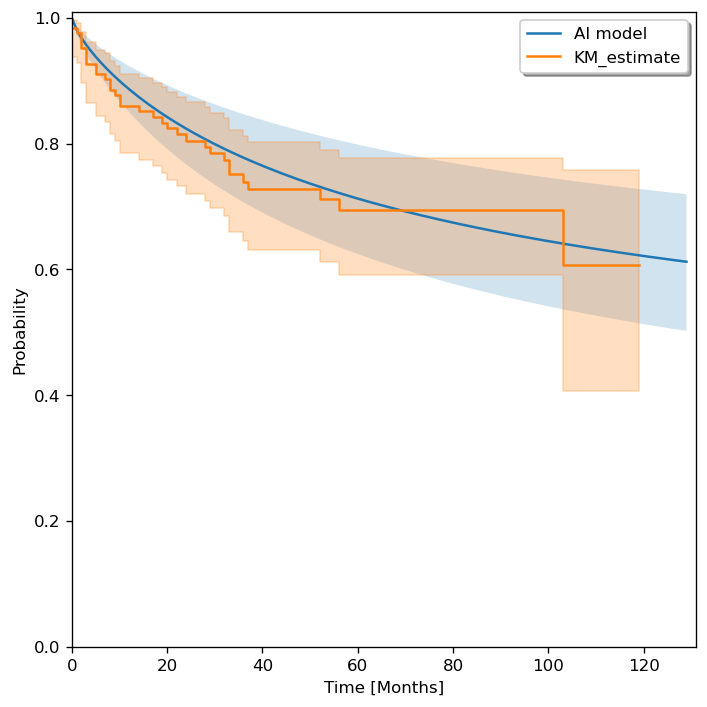

In [77]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)

line1, = ax.plot(mean_pfs.columns, mean_pfs.mean(), label="AI model")
line2 = ax.fill_between(mean_pfs.columns, lower_ci_pfs.mean(), upper_ci_pfs.mean(), alpha=0.2)

line3 = kmf.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
# for index, row in mean_pfs.iterrows():
#     plt.plot(row.index, row.values, marker='', color='grey', linewidth=0.3, alpha=0.8)

ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [78]:
mean_pfs.columns

Float64Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,
                9.0,
              ...
              120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0,
              129.0],
             dtype='float64', length=130)

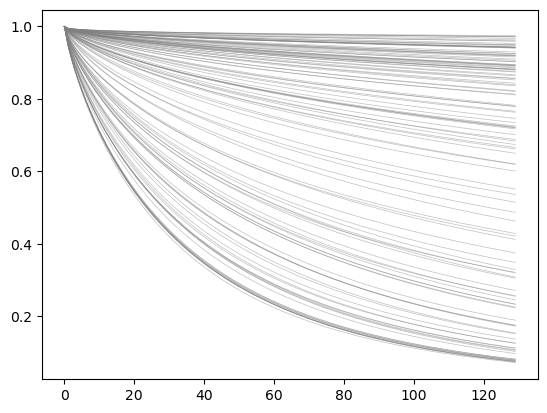

In [79]:
plt.figure()
for index, row in mean_pfs.iterrows():
    plt.plot(row.index, row.values, marker='', color='grey', linewidth=0.5, alpha=0.5)
    

In [80]:
mean_pfs

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
0,1.0,0.988068,0.980828,0.974692,0.969187,0.964116,0.959370,0.954882,0.950608,0.946514,...,0.731465,0.730283,0.729108,0.727939,0.726776,0.725620,0.724471,0.723327,0.722190,0.721059
1,1.0,0.993170,0.989845,0.987126,0.984735,0.982559,0.980542,0.978647,0.976851,0.975139,...,0.886421,0.885926,0.885434,0.884944,0.884457,0.883973,0.883491,0.883011,0.882534,0.882059
2,1.0,0.958850,0.929599,0.904025,0.880767,0.859214,0.839015,0.819943,0.801837,0.784578,...,0.166764,0.164993,0.163246,0.161524,0.159824,0.158148,0.156494,0.154863,0.153253,0.151665
3,1.0,0.961223,0.933874,0.909996,0.888289,0.868168,0.849302,0.831475,0.814537,0.798376,...,0.191544,0.189647,0.187774,0.185925,0.184099,0.182297,0.180517,0.178760,0.177024,0.175311
4,1.0,0.954514,0.921788,0.893114,0.867025,0.842852,0.820212,0.798853,0.778597,0.759311,...,0.115900,0.114362,0.112849,0.111360,0.109895,0.108454,0.107037,0.105641,0.104268,0.102917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,1.0,0.954576,0.921809,0.893067,0.866899,0.842644,0.819923,0.798485,0.778155,0.758800,...,0.118710,0.117181,0.115675,0.114194,0.112736,0.111301,0.109889,0.108499,0.107130,0.105783
122,1.0,0.994497,0.992001,0.990015,0.988300,0.986760,0.985346,0.984029,0.982790,0.981615,...,0.921472,0.921119,0.920767,0.920417,0.920069,0.919722,0.919376,0.919032,0.918689,0.918348
123,1.0,0.992383,0.988492,0.985313,0.982521,0.979984,0.977634,0.975429,0.973341,0.971350,...,0.862837,0.862178,0.861522,0.860869,0.860219,0.859571,0.858925,0.858283,0.857643,0.857005
124,1.0,0.992416,0.988343,0.984994,0.982044,0.979359,0.976871,0.974535,0.972323,0.970216,...,0.861389,0.860772,0.860159,0.859548,0.858941,0.858336,0.857735,0.857136,0.856540,0.855947


In [81]:
mean_pfs.loc[[29]]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
29,1.0,0.970158,0.949884,0.932337,0.916443,0.901728,0.887928,0.874872,0.862445,0.850559,...,0.32686,0.32469,0.322541,0.320412,0.318303,0.316213,0.314144,0.312093,0.310061,0.308048


In [82]:
PRG_test, PFS_test = convert_y(y_test_pfs)

In [83]:
mean_pfs['PRG_test'] = PRG_test

In [84]:
mean_pfs['PFS_test'] = PFS_test

In [85]:
temp = mean_pfs[mean_pfs['PRG_test']==True]

In [86]:
temp['PFS_test'].values

array([  0.,  29.,  19.,  36.,  32.,  52.,   3.,   2.,  10.,   5.,   1.,
         7.,   0.,   8.,  10.,  56., 103.,   9.,  22.,   8.,  37.,   2.,
        33.,  24.,   2.,   3.,  33.,  28.,   3.,  14.,   5.,  20.,  17.])

In [87]:
# temp['e_proba'] = temp.PFS_test.apply(lambda x: temp[x], print(x))
# temp.PFS_test.apply(lambda x: print(x))

In [88]:
dist_calibration_score(y_test_pfs, mean_pfs, returns="all")

{'statistic': 1.6282418684014817,
 'pval': 0.9960788839365216,
 'max_deviation': 0.2402129571219378,
 'histogram': bin
 (-0.001, 0.1]    12.357358
 (0.1, 0.2]       12.357358
 (0.2, 0.3]       11.947051
 (0.3, 0.4]       10.827304
 (0.4, 0.5]       11.991357
 (0.5, 0.6]       12.426069
 (0.6, 0.7]       12.821995
 (0.7, 0.8]       10.935672
 (0.8, 0.9]       15.626683
 (0.9, 1.0]       14.709153
 dtype: float64}

In [89]:
predicted_surv = mean_pfs

In [90]:
mean_pfs.mean()

0.0          1.000000
1.0          0.980696
2.0          0.968024
3.0          0.957085
4.0          0.947200
              ...    
127.0        0.614071
128.0        0.613081
129.0        0.612101
PRG_test     0.261905
PFS_test    42.333333
Length: 132, dtype: float64

In [91]:
from bisect import bisect_right
def _match_times_to_windows(times, windows):
    matches = np.array([bisect_right(windows, e) for e in times])
    matches = np.clip(matches, 0, len(windows) - 1)
    return windows[matches]

In [92]:
X_test.loc[29]

Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [93]:
y_test_back[y_test_back['Prg']==1]

,Prg,PFS,OS,Surv
88,1.0,0.0,0.0,107
301,1.0,29.0,0.0,59
390,1.0,19.0,0.0,38
105,1.0,36.0,1.0,43
305,1.0,32.0,1.0,35
303,1.0,52.0,1.0,53
2,1.0,3.0,1.0,113
170,1.0,2.0,1.0,4
342,1.0,10.0,1.0,18
120,1.0,5.0,1.0,9


In [94]:
mean_pfs.set_index(keys =y_test_back.index, inplace=True )
upper_ci_pfs.set_index(keys =y_test_back.index, inplace=True )
lower_ci_pfs.set_index(keys =y_test_back.index, inplace=True )

In [95]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_pfs = bootstrap_estimator_pfs.predict(X_train)
print(f"C-index: {concordance_index(y_train_pfs, mean_1_pfs)}")

C-index: 0.8126293326435592


In [96]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_pfs = bootstrap_estimator_pfs.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_pfs, mean_2_pfs)}")

C-index: 0.7219307450157397


##2. OS

In [97]:
E_2=y_test['OS']
T_2=y_test['Surv']

In [98]:
y_test

,Prg,PFS,OS,Surv
584,0.0,32.0,0.0,32
572,0.0,31.0,0.0,31
167,0.0,0.0,0.0,0
45,0.0,108.0,0.0,108
641,0.0,25.0,0.0,25
...,...,...,...,...
272,0.0,56.0,0.0,56
506,0.0,42.0,0.0,42
7,0.0,119.0,0.0,119
179,0.0,84.0,0.0,84


In [99]:
weight_2 = len(E_2[E_2==0])/len(E_2[E_2==1])

In [100]:
weight_2

2.4054054054054053

In [101]:
from lifelines import KaplanMeierFitter
kmf_os = KaplanMeierFitter()

kmf_os.fit(T_2, E_2)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 126 total observations, 89 right-censored observations>

In [102]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              # 'booster': 'dart',
              'scale_pos_weight': weight_2
              }  # Hyperparameters common to all trials



def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.3,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_os, num_boost_round=100,
                    evals=[(xgb_train_os, 'train'), (xgb_valid_os, 'valid')],
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [103]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, timeout=10)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2023-10-18 08:18:25,743] A new study created in memory with name: no-name-dd64c70a-8a05-49fe-9ddd-ff6d452c3e8e
[I 2023-10-18 08:18:25,891] Trial 0 finished with value: 2.157383603445787 and parameters: {'learning_rate': 0.09913541897202277, 'aft_loss_distribution': 'normal', 'aft_loss_distribution_scale': 1.609966409930221, 'max_depth': 15, 'lambda': 0.5416731187433677, 'alpha': 0.537379223057302, 'min_child_weight': 3.414626777469624, 'colsample_bynode': 0.8439939966225963, 'colsample_bytree': 0.7882307988494144, 'colsample_bylevel': 0.9342887282508126}. Best is trial 0 with value: 2.157383603445787.
[I 2023-10-18 08:18:26,019] Trial 1 finished with value: 2.175145479770334 and parameters: {'learning_rate': 0.03617496319975374, 'aft_loss_distribution': 'normal', 'aft_loss_distribution_scale': 1.1530994503740992, 'max_depth': 6, 'lambda': 0.19881452871080818, 'alpha': 0.5822566874904663, 'min_child_weight': 6.067024552760446, 'colsample_bynode': 0.9593556088613913, 'colsample_bytree

Completed hyperparameter tuning with best aft-nloglik = 2.1482657443965083.


In [104]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [105]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [106]:
plot_parallel_coordinate(study)

[W 2023-10-18 08:18:35,903] Trial 25 is omitted in visualization because its objective value is inf or nan.
[W 2023-10-18 08:18:35,903] Trial 69 is omitted in visualization because its objective value is inf or nan.
c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\JUN\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [107]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'tree_method': 'hist',
 'scale_pos_weight': 2.4054054054054053,
 'learning_rate': 0.0362321271515265,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.8644427239287029,
 'max_depth': 19,
 'lambda': 0.12066268315066764,
 'alpha': 0.020596605652007133,
 'min_child_weight': 2.3330871182992103,
 'colsample_bynode': 0.925060437705235,
 'colsample_bytree': 0.9970310997652674,
 'colsample_bylevel': 0.8921186214760788}

In [108]:
# %%time

# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_os = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_os.fit(X_train, y_train_os,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_os),
                early_stopping_rounds=50,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_os = XGBSEBootstrapEstimator(xgbse_model_os, n_estimators=30)
bootstrap_estimator_os.fit(
    X_train,
    y_train_os,
    validation_data=(X_test, y_test_os),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean, upper_ci, lower_ci = xgbse_model.predict(X_test, return_ci=True)


# # predicting
mean_os, upper_ci_os, lower_ci_os = bootstrap_estimator_os.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_os, mean_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_os, mean_os)}")
print(f"Calibration Score: {dist_calibration_score(y_test_os, mean_os)> 0.05}")


C-index: 0.824211204121056
Avg. Brier Score: 0.13031026235560728
Calibration Score: False


In [109]:
dist_calibration_score(y_test_os, mean_os)

0.027007048940680903

In [110]:
bootstrap_estimator_os

XGBSEBootstrapEstimator(base_estimator=XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                                                           xgb_params={'aft_loss_distribution': 'logistic',
                                                                       'aft_loss_distribution_scale': 0.8644427239287029,
                                                                       'alpha': 0.020596605652007133,
                                                                       'colsample_bylevel': 0.8921186214760788,
                                                                       'colsample_bynode': 0.925060437705235,
                                                                       'colsample_bytree': 0.9970310997652674,
                                                                       'eval_metric': 'aft-nloglik',
                                                                       'lambda': 0.12066268315066764,
                                                                       'learning_rate': 0.0362321271515265,
                                                                       'max_depth': 19,
                                                                       'min_child_weight': 2.3330871182992103,
                                                                       'objective': 'survival:aft',
                                                                       'scale_pos_weight': 2.4054054054054053,
                                                                       'tree_method': 'hist',
                                                                       'verbosity': 0}),
                        n_estimators=30)

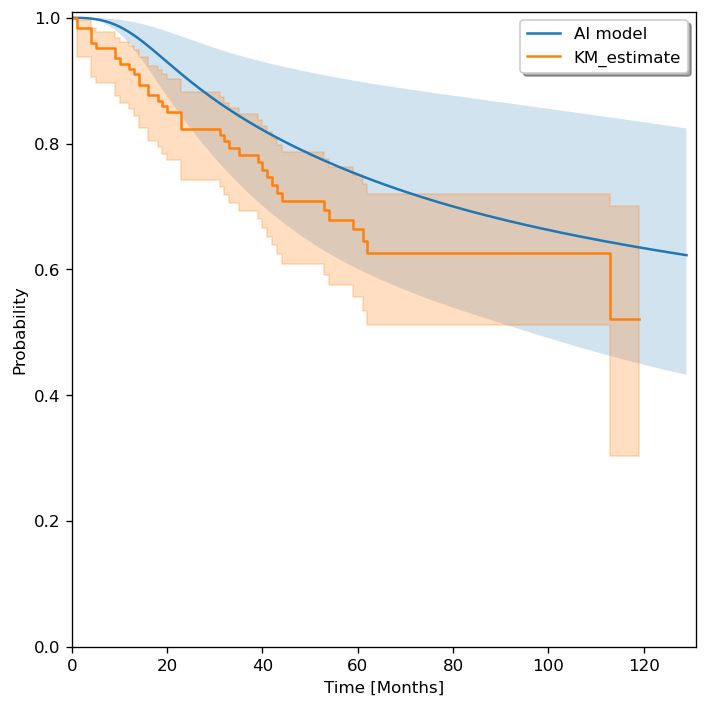

In [111]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_os.columns, mean_os.mean(), label="AI model")
line2 = ax.fill_between(mean_os.columns, lower_ci_os.mean(), upper_ci_os.mean(), alpha=0.2)


line3 = kmf_os.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [112]:
dist_calibration_score(y_test_os, mean_os, returns="all")

{'statistic': 18.79350616168495,
 'pval': 0.027007048940680903,
 'max_deviation': 1.128230481385907,
 'histogram': bin
 (-0.001, 0.1]    11.290749
 (0.1, 0.2]       12.290749
 (0.2, 0.3]       11.290749
 (0.3, 0.4]       11.155219
 (0.4, 0.5]        9.436666
 (0.5, 0.6]        9.917217
 (0.6, 0.7]       11.512547
 (0.7, 0.8]       12.945363
 (0.8, 0.9]        9.345035
 (0.9, 1.0]       26.815704
 dtype: float64}

In [113]:
predicted_surv = mean_os

In [114]:
mean_os.mean()

0.0      1.000000
1.0      0.999965
2.0      0.999806
3.0      0.999442
4.0      0.998800
           ...   
125.0    0.627384
126.0    0.626160
127.0    0.624947
128.0    0.623745
129.0    0.622555
Length: 130, dtype: float64

In [115]:
X_test.loc[29]

Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [116]:
y_test_back[y_test_back['Prg']==1]

,Prg,PFS,OS,Surv
88,1.0,0.0,0.0,107
301,1.0,29.0,0.0,59
390,1.0,19.0,0.0,38
105,1.0,36.0,1.0,43
305,1.0,32.0,1.0,35
303,1.0,52.0,1.0,53
2,1.0,3.0,1.0,113
170,1.0,2.0,1.0,4
342,1.0,10.0,1.0,18
120,1.0,5.0,1.0,9


In [117]:
mean_os.set_index(keys =y_test_back.index, inplace=True )
upper_ci_os.set_index(keys =y_test_back.index, inplace=True )
lower_ci_os.set_index(keys =y_test_back.index, inplace=True )

In [118]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_os = bootstrap_estimator_os.predict(X_train)
print(f"C-index: {concordance_index(y_train_os, mean_1_os)}")

C-index: 0.9340693569599224


In [119]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_os = bootstrap_estimator_os.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_os, mean_2_os)}")

C-index: 0.6276322547508988


##3. Save

In [120]:
import pickle

# 모델 저장
pickle.dump(bootstrap_estimator_os, open(savepath+'UTUC_CSS.pkl', 'wb'))

In [121]:

pickle.dump(bootstrap_estimator_pfs, open(savepath+'UTUC_PFS.pkl', 'wb'))

In [122]:
savepath

'./save/'

In [123]:
import pickle

In [124]:
import lime
import lime.lime_tabular

In [125]:
from traitlets.config import validate
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model_pfs = xgb.train(
            params,
            xgb_train_pfs,
            # maximize=True,
            evals= [(xgb_valid_pfs, 'eval')],
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'scale_pos_weight': 2.4054054054054053, 'learning_rate': 0.0362321271515265, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.8644427239287029, 'max_depth': 19, 'lambda': 0.12066268315066764, 'alpha': 0.020596605652007133, 'min_child_weight': 2.3330871182992103, 'colsample_bynode': 0.925060437705235, 'colsample_bytree': 0.9970310997652674, 'colsample_bylevel': 0.8921186214760788}
[0]	eval-aft-nloglik:3.93856
[10]	eval-aft-nloglik:2.31137
[20]	eval-aft-nloglik:1.97062
[30]	eval-aft-nloglik:1.82734
[40]	eval-aft-nloglik:1.76261
[50]	eval-aft-nloglik:1.72796
[60]	eval-aft-nloglik:1.70902
[70]	eval-aft-nloglik:1.70141
[80]	eval-aft-nloglik:1.70460
[90]	eval-aft-nloglik:1.70589
[100]	eval-aft-nloglik:1.71306
[110]	eval-aft-nloglik:1.72036
[120]	eval-aft-nloglik:1.72275
[130]	eval-aft-nloglik:1.72965
[140]	eval-aft-nloglik:1.73477
[150]

In [126]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model_pfs.predict(xgb_test_pfs).astype(float)
T = meta['PFS'][test_idx]
E = meta['Prg'][test_idx]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

C-index: 0.715
Average survival time: 587 Months


In [127]:
preds_2 = xgb_model_pfs.predict(xgb_train_pfs).astype(float)
T_2 = meta['PFS'][train_idx]
E_2 = meta['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model_pfs.predict(xgb_valid_pfs).astype(float)
T_3 = meta['PFS'][valid_idx]
E_3 = meta['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

0.9857876162977222 0.673924313115604


In [128]:
X.columns

Index(['Age', 'Female', 'BMI', 'Pre_GFR', 'Location_Pelvis',
       'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade',
       'Path_CIS'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

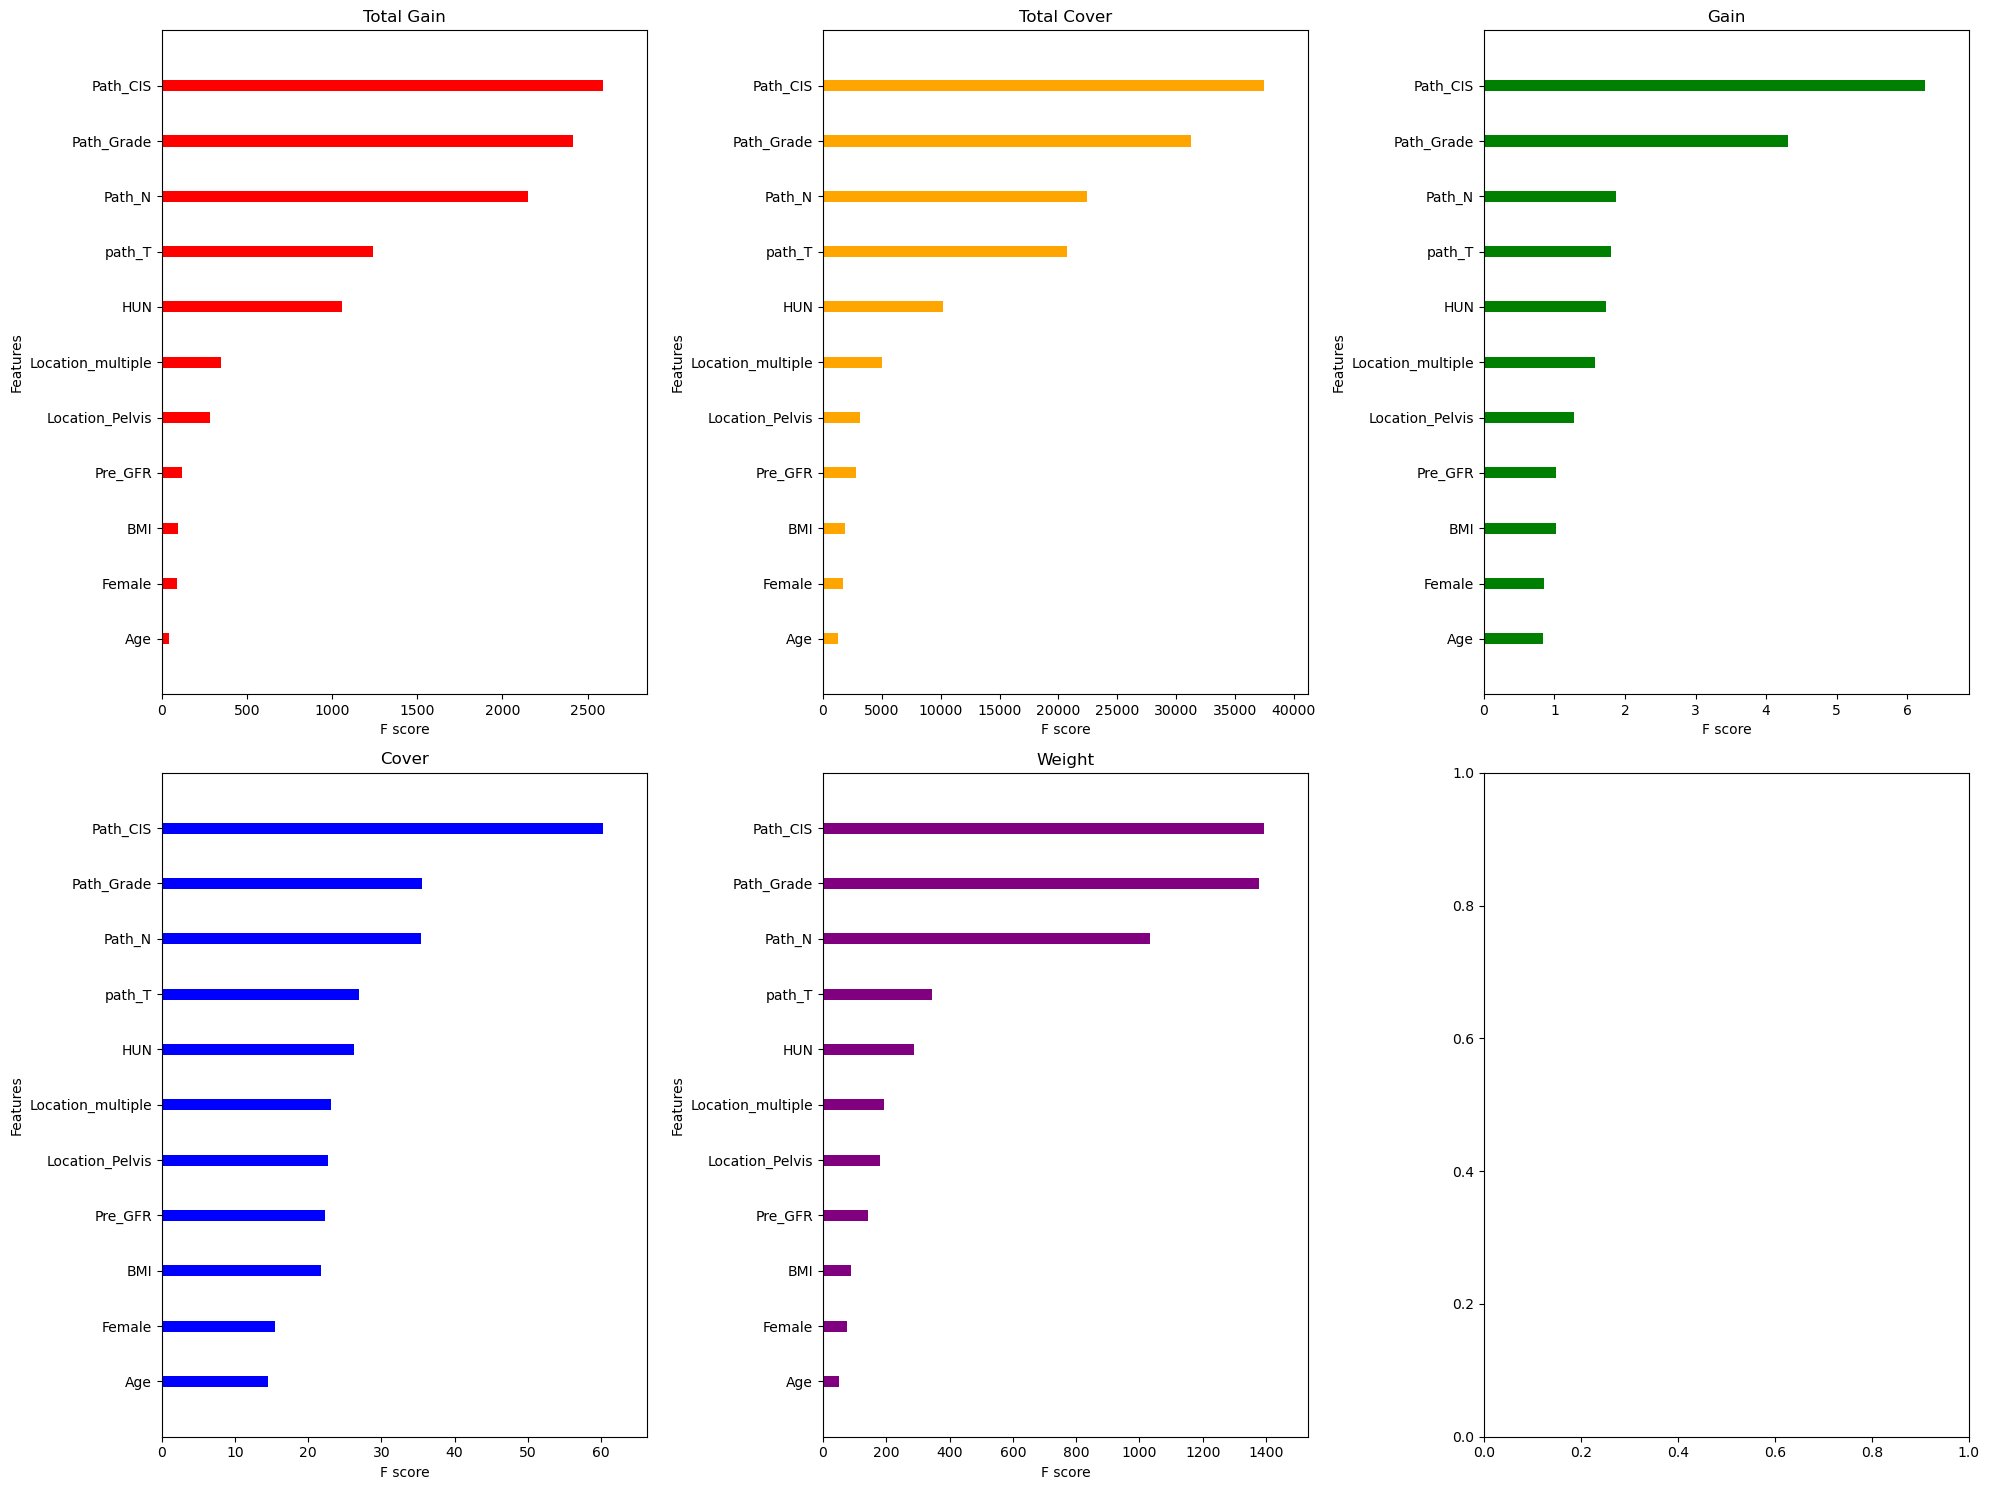

In [129]:
from xgboost import plot_importance

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = [ax for row_axes in axes for ax in row_axes]

plot_importance(xgb_model_pfs,importance_type='total_gain', title='Total Gain', grid=False, ax=axes[0], color='red',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='total_cover', title='Total Cover', grid=False, ax=axes[1] ,color='orange',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='gain', title='Gain', grid=False, ax=axes[2], color='green',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='cover', title='Cover', grid=False, ax=axes[3], color='blue',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='weight', title='Weight', grid=False, ax=axes[4], color='purple',show_values=False).set_yticklabels(X.columns)

plt.tight_layout()
plt
plt.show


In [130]:
import lime
import lime.lime_tabular

# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Progression'], verbose=True, mode='regression')

In [131]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46
columns = X_train.columns

def xgbse_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=columns)
    return bootstrap_estimator_pfs.predict(data_asframe)

In [132]:
import shap

In [133]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46

#### Kernel SHAP
shap_kernel_explainer = shap.KernelExplainer(xgbse_predict, X_train.head(30))

# Explain a single instance - output: (1, n_time_buckets, n_features)
shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# Get explanations for the first time bucket
first_time_bucket_shap_values = pd.Series(shap_one[0])

# Print shap values for the first time bucket and the corresponding features
print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

      0                  1
0   0.0                Age
1   0.0             Female
2   0.0                BMI
3   0.0            Pre_GFR
4   0.0    Location_Pelvis
5   0.0  Location_multiple
6   0.0                HUN
7   0.0             path_T
8   0.0             Path_N
9   0.0         Path_Grade
10  0.0           Path_CIS


In [134]:
# shap_one = shap_kernel_explainer.shap_values(X_train)

In [135]:

# #### Kernel SHAP


# # Explain a single instance - output: (1, n_time_buckets, n_features)
# shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# # Get explanations for the first time bucket
# first_time_bucket_shap_values = pd.Series(shap_one[0])

# # Print shap values for the first time bucket and the corresponding features
# print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

In [136]:
# shap.summary_plot(first_time_bucket_shap_values, X_train)

In [137]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))
ext_2 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_Hallym.csv'))

In [138]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True)
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True)
ext_1['Path_N'].replace({'N2':1},inplace=True)
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True)
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True)
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True)
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True)
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True)
ext_1['OS'] = ext_1['OS'].astype(float)

In [139]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv','path_T'])
ext_2 = ext_2.dropna(subset=['Prg','PFS','OS', 'Surv',])

In [140]:
# X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','OS', 'Surv']]

In [141]:
X_snu.describe()

,Age,Female,BMI,Pre_GFR,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
count,159.000000,159.000000,159.000000,157.000000,159.000000,159.000000,158.000000,159.000000,38.000000,149.000000,159.000000
mean,68.427673,0.289308,24.994969,62.662420,0.452830,0.081761,0.474684,3.358491,0.131579,0.805369,0.333333
std,9.921501,0.454874,3.297483,22.110792,0.499343,0.274866,0.500946,1.346740,0.342570,0.397252,0.472894
min,41.000000,0.000000,18.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,22.950000,48.400000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,0.000000,24.900000,61.200000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,75.000000,1.000000,26.650000,78.600000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000
max,93.000000,1.000000,40.900000,120.800000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [142]:
# X_Hallym = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade']]
X_Hallym = ext_2[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade',"Path_CIS"]]
y_Hallym = ext_2[['Prg', 'PFS','OS', 'Surv']]


In [143]:

# mean_snu, upper_ci_snu, lower_ci_snu = bootstrap_estimator_pfs.predict(X_snu.iloc[[0]], return_ci=True)

In [144]:
y_snu_anal_pfs = convert_to_structured(y_snu['PFS'], y_snu['Prg'])
y_snu_anal_os = convert_to_structured(y_snu['Surv'], y_snu['OS'])

y_Hallym_anal_pfs = convert_to_structured(y_Hallym['PFS'], y_Hallym['Prg'])
y_Hallym_anal_os = convert_to_structured(y_Hallym['Surv'], y_Hallym['OS'])

In [145]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_snu_pfs, upper_ci_snu_pfs, lower_ci_snu_pfs = bootstrap_estimator_pfs.predict(X_snu, return_ci=True)
mean_snu_os, upper_ci_snu_os, lower_ci_snu_os = bootstrap_estimator_os.predict(X_snu, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)}")

C-index: 0.7319182389937107
Avg. Brier Score: 0.016911423354630053
Calibration Score: True
Calibration Score: 0.9999950513731687


In [146]:
print(f"C-index: {concordance_index(y_snu_anal_os, mean_snu_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_os, mean_snu_os)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)}")

C-index: 0.9407407407407408
Avg. Brier Score: 0.0016560549248391188
Calibration Score: True
Calibration Score: 0.9999999998840499


In [147]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_Hallym_pfs, upper_ci_Hallym_pfs, lower_ci_Hallym_pfs = bootstrap_estimator_pfs.predict(X_Hallym, return_ci=True)
mean_Hallym_os, upper_ci_Hallym_os, lower_ci_Hallym_os = bootstrap_estimator_os.predict(X_Hallym, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")

C-index: 0.7615081104778606
Avg. Brier Score: 0.1566089368198009
Calibration Score: True
Calibration Score: 0.3913367265946717


In [148]:
print(f"C-index: {concordance_index(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)}")

C-index: 0.7132284921369103
Avg. Brier Score: 0.0902164273577438
Calibration Score: True
Calibration Score: 0.6239454446570116


In [149]:
tt = ext_1['PFS'].max()
print(tt)

31.5


In [150]:
# mean_snu = mean_snu.loc[:,0:tt]

# upper_ci_snu = upper_ci_snu.loc[:,0:tt]
# lower_ci_snu = lower_ci_snu.loc[:,0:tt]

In [151]:
E_snu, T_snu  = convert_y(y_snu_anal_pfs)
E_snu, T_snu  = convert_y(y_snu_anal_pfs)

In [152]:
from lifelines import KaplanMeierFitter
kmf_2 = KaplanMeierFitter()

kmf_2.fit(T_snu, E_snu)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 159 total observations, 147 right-censored observations>

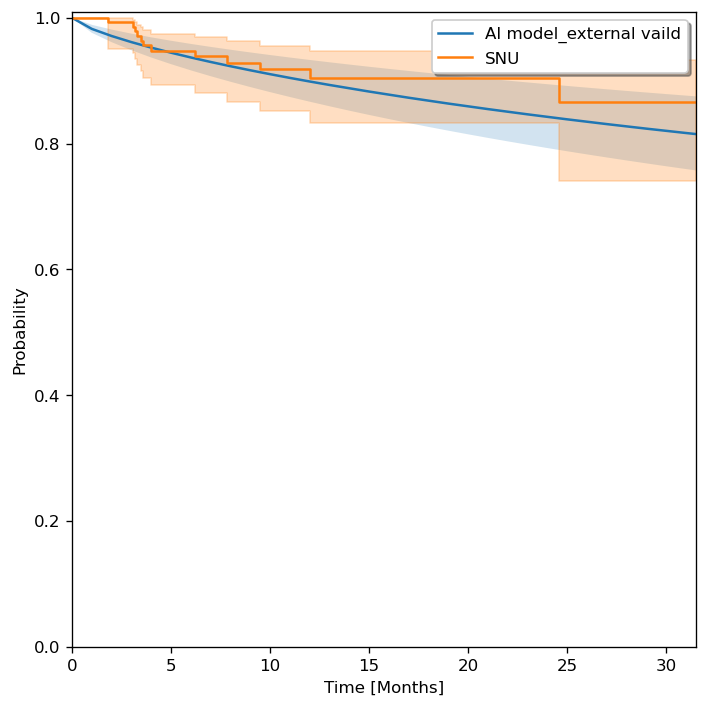

In [153]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_snu_pfs.columns, mean_snu_pfs.mean(), label="AI model_external vaild")
line2 = ax.fill_between(mean_snu_pfs.columns, lower_ci_snu_pfs.mean(), upper_ci_snu_pfs.mean(), alpha=0.2)

line3 = kmf_2.plot_survival_function(label='SNU')
# line4 = kmf_3.plot_survival_function(label='SNU')


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, tt])
plt.ylim([0.0, 1.01])
plt.tight_layout()